## Analysis of a pilot study of the effect of 2.5% Polyacrylamide Hydrogel in the management of joint lameness in a population of flat racing thoroughbreds

### Introduction

##### Osteoarthritis is a serious debilitating condition affecting over 50% of horses above the age of 15. Without treatment, it is always progressive. The database represents findings of a pilot study on the effect of treatment of carpal and metacarpophalangeal joint lameness with 2.5% cross-linked polyacrylamide hydrogel conducted in 2016/17. A total of 49 flat-racing throughbreds at a single training facility were included in the study. 
##### Shortcomings are clearly that this study did not include a control group and was not double-blind. However, as arthritis is a progressive disease, the alternative to treatment is well understood. 

The data set provides horse identification, sex and age (year of birth) of the horse, identifies the involved joint, provides a radiological score at the time of administration, lameness grades at 0,1,4,12 and 26 weeks, previous intra-articular treatments, joint effusion grades, range of motion of affected joints and some statistical analysis of the data set.

Data compiled by:

de Clifford, Leigh; Bolwell, Charlotte; David, Florent; Lowe, Jason; McKellar, Campbell (2019), “Data for: USE OF A 2.5% POLYACRYLAMIDE HYDROGEL IN THE MANAGEMENT OF JOINT LAMENESS IN A POPULATION OF FLAT RACING THOROUGHBREDS: A PILOT STUDY”, Mendeley Data, V1, doi: 10.17632/ttfn93rdt4.1

### Loading the libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings 
warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel("Arthramid__current_may17_49Charlotte.xlsx")
df.head()

,horseid,joint,side,time,age,previous_tx,radio_score,lame,effu,rom,vet,gender,pred_prob,_est_A,_est_B
0,65,3,1,0,2009.0,0,1,2,1,0,MVS,Male,0.029125,1,1
1,67,3,0,26,2009.0,0,1,0,0,0,MVS,Male,0.180031,1,1
2,66,3,0,26,2011.0,0,2,0,0,0,MVS,Male,0.161118,1,1
3,36,3,1,0,NaN,0,1,2,0,0,KM,NaN,0.135424,1,1
4,62,3,1,26,2009.0,1,2,0,0,0,TP,female,0.021236,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   horseid      514 non-null    int64  
 1   joint        514 non-null    int64  
 2   side         514 non-null    int64  
 3   time         514 non-null    int64  
 4   age          434 non-null    float64
 5   previous_tx  514 non-null    int64  
 6   radio_score  514 non-null    int64  
 7   lame         514 non-null    int64  
 8   effu         514 non-null    int64  
 9   rom          514 non-null    int64  
 10  vet          514 non-null    object 
 11  gender       434 non-null    object 
 12  pred_prob    514 non-null    float64
 13  _est_A       514 non-null    int64  
 14  _est_B       514 non-null    int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 60.4+ KB


### Data overview and cleaning

In [4]:
df.describe()

,horseid,joint,side,time,age,previous_tx,radio_score,lame,effu,rom,pred_prob,_est_A,_est_B
count,514.000000,514.000000,514.000000,514.000000,434.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.0,514.0
mean,34.118677,2.737354,0.505837,8.566148,2009.870968,0.282101,0.807393,1.130350,0.274319,0.192607,0.217309,1.0,1.0
std,20.345541,0.654186,0.500453,9.654686,1.532386,0.450461,0.915464,1.065374,0.555534,0.394731,0.175207,0.0,0.0
min,1.000000,1.000000,0.000000,0.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,1.0,1.0
25%,16.000000,3.000000,0.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053393,1.0,1.0
50%,31.000000,3.000000,1.000000,4.000000,2010.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.185025,1.0,1.0
75%,52.000000,3.000000,1.000000,12.000000,2011.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.346584,1.0,1.0
max,67.000000,3.000000,1.000000,26.000000,2013.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.533582,1.0,1.0


In [5]:
df.describe(include="object")

,vet,gender
count,514,434
unique,3,2
top,KM,Male
freq,429,289


In [6]:
df.isna().sum()

horseid         0
joint           0
side            0
time            0
age            80
previous_tx     0
radio_score     0
lame            0
effu            0
rom             0
vet             0
gender         80
pred_prob       0
_est_A          0
_est_B          0
dtype: int64

In [7]:
df.fillna("NA",inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.groupby("time").count()

,horseid,joint,side,age,previous_tx,radio_score,lame,effu,rom,vet,gender,pred_prob,_est_A,_est_B
time,,,,,,,,,,,,,,
0,103,103,103,103,103,103,103,103,103,103,103,103,103,103
1,103,103,103,103,103,103,103,103,103,103,103,103,103,103
4,103,103,103,103,103,103,103,103,103,103,103,103,103,103
12,103,103,103,103,103,103,103,103,103,103,103,103,103,103
26,102,102,102,102,102,102,102,102,102,102,102,102,102,102


It appears that for one horse and joint, the assessment at 26 weeks has not been completed. When it comes to analysing the study results, we will either need to exclude this horse joint or focus on comparison of the data set at 0 and 12 weeks. 

In [10]:
find = df.groupby(["horseid","joint","side"])["time"].count().reset_index()
find[find.time!=5]

,horseid,joint,side,time
28,18,3,0,4


We will take a closer look at this joint to see if anything unusual is observed:

In [11]:
df[df.horseid==18]

,horseid,joint,side,time,age,previous_tx,radio_score,lame,effu,rom,vet,gender,pred_prob,_est_A,_est_B
22,18,3,0,12,2011.0,0,0,1,0,0,KM,Male,0.355413,1,1
165,18,3,0,4,2011.0,0,0,1,0,0,KM,Male,0.533582,1,1
316,18,3,0,0,2011.0,0,0,3,1,0,KM,Male,0.010659,1,1
317,18,3,0,1,2011.0,0,0,1,0,0,KM,Male,0.162783,1,1


It appears the lameness grade in this joint reduced from 3 to 1 quickly after injection, and then remained stable, and effusion reduced from 1 to 0. We might be willing to assume that this remained the same in week 26, but to be on the safe side, we will exclude the horse from the analysis altogether.

In [12]:
df_original = df.copy()

In [13]:
df = df[df.horseid!=18]

In [14]:
df.groupby("time").count()

,horseid,joint,side,age,previous_tx,radio_score,lame,effu,rom,vet,gender,pred_prob,_est_A,_est_B
time,,,,,,,,,,,,,,
0,102,102,102,102,102,102,102,102,102,102,102,102,102,102
1,102,102,102,102,102,102,102,102,102,102,102,102,102,102
4,102,102,102,102,102,102,102,102,102,102,102,102,102,102
12,102,102,102,102,102,102,102,102,102,102,102,102,102,102
26,102,102,102,102,102,102,102,102,102,102,102,102,102,102


### EDA

In [15]:
print("% of horse joints in lameness grade x weeks post injection:")
round(pd.crosstab(df.time,df.lame)/102*100,1)

% of horse joints in lameness grade x weeks post injection:


lame,0,1,2,3
time,,,,
0,0.0,6.9,50.0,43.1
1,0.0,36.3,62.7,1.0
4,44.1,38.2,13.7,3.9
12,76.5,9.8,8.8,4.9
26,76.5,9.8,7.8,5.9


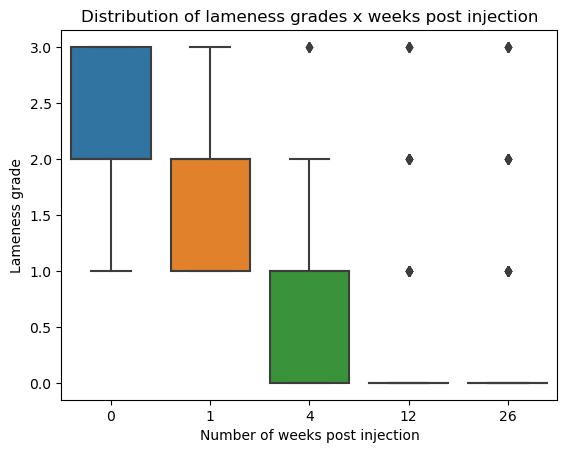

In [16]:
fig,ax = plt.subplots()
ax=sns.boxplot(data=df, x="time",y="lame")
ax.set_title("Distribution of lameness grades x weeks post injection")
ax.set_xlabel("Number of weeks post injection")
ax.set_ylabel("Lameness grade");

In [17]:
df.groupby("time")["lame","effu"].agg(["mean","max","min"])

lame              effu        
          mean max min      mean max min
time                                    
0     2.362745   3   1  0.686275   2   0
1     1.647059   3   1  0.362745   2   0
4     0.774510   3   0  0.156863   1   0
12    0.421569   3   0  0.078431   1   0
26    0.431373   3   0  0.088235   2   0

It appears that on average, a significant improvement in lameness scores is observed between the injection and 4 weeks post injection. Lameness scores stabilize after about 12 weeks, with no further improvement noted thereafter. 

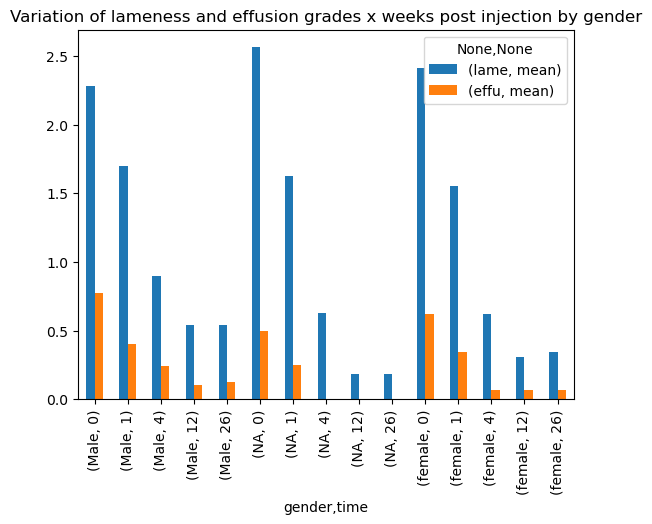

In [18]:
ax = df.groupby(["gender","time"])["lame","effu"].agg(["mean"]).plot(kind="bar")
ax.set_title("Variation of lameness and effusion grades x weeks post injection by gender");

It appears that on average, the improvement observed is higher in female than in male subjects, but given the small sample size and that a number of horses have not been grouped by gender (and these appear to show an even greater improvement), we do not propose to dive deeper into this finding at this stage.

In [19]:
df["agegroup"]=np.where(df.age=="NA",0,df.age)
df["agegroup"]=np.where(df.agegroup==0,"NA",np.where(df.agegroup<=2010,"older","younger"))

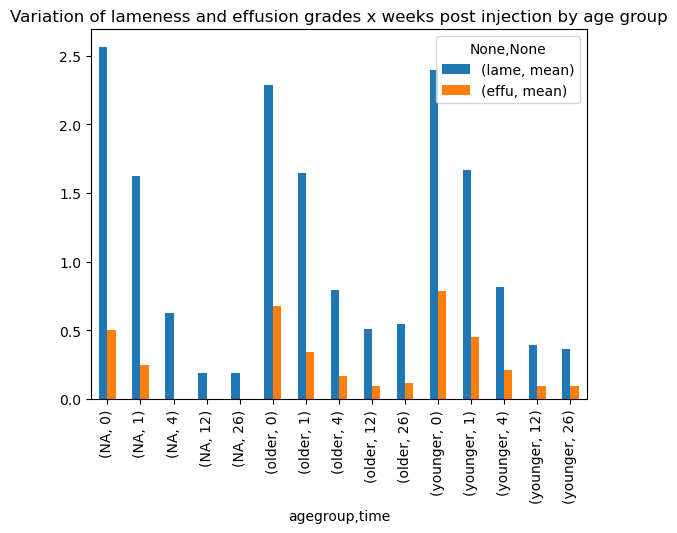

In [20]:
ax = df.groupby(["agegroup","time"])["lame","effu"].agg(["mean"]).plot(kind="bar");
ax.set_title("Variation of lameness and effusion grades x weeks post injection by age group");

It appears that on average, a greater improvement can be observed for younger than for older horses, but given the small sample size and that the age of a number of horses is missing (and these appear to show the greatest improvement), we do not propose to dive deeper into this finding at this stage.

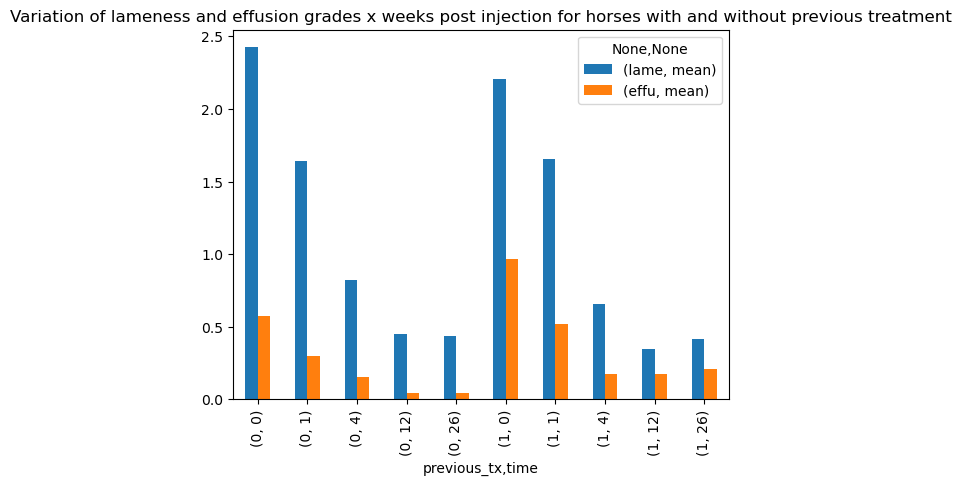

In [21]:
ax = df.groupby(["previous_tx","time"])["lame","effu"].agg(["mean"]).plot(kind="bar");
ax.set_title("Variation of lameness and effusion grades x weeks post injection for horses with and without previous treatment");

The observed relative improvement in lameness grades may be slightly better for horses that have not had any previous treatments (we expect that this would have been the "standard" steroid injections into the joint). However, the difference does not appear sufficiently material to merit much deeper analysis at this point.

#### Pairwise comparison

In [22]:
df0 = df[df.time==0]
df26 = df[df.time==26]

In [23]:
before=df0.groupby(["horseid","joint","side"])["lame"].mean().reset_index()

In [24]:
after=df26.groupby(["horseid","joint","side"])["lame"].mean().reset_index()

In [25]:
combined=pd.merge(before,after,on=["horseid","joint","side"])
combined.rename(columns={"lame_x":"lame_before","lame_y":"lame_after"},inplace=True)

In [26]:
combined["pct_improvement"]=-(combined.lame_after/combined.lame_before-1)*100

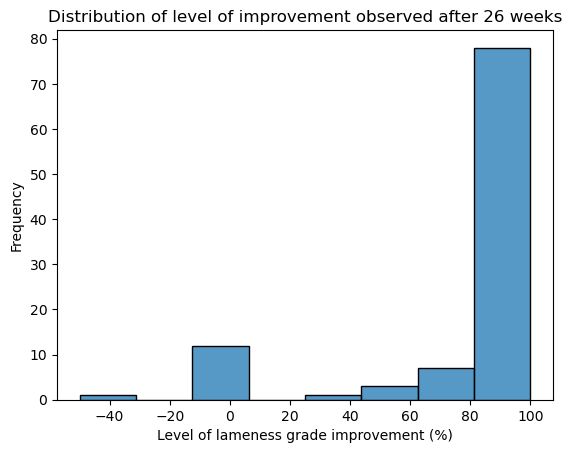

In [27]:
fig,ax = plt.subplots(1,1)
ax=sns.histplot(combined.pct_improvement)
ax.set_title("Distribution of level of improvement observed after 26 weeks")
ax.set_xlabel("Level of lameness grade improvement (%)")
ax.set_ylabel("Frequency");

Bear in mind, however, that lameness grades are ordinal and % improvement is therefore indicative only.

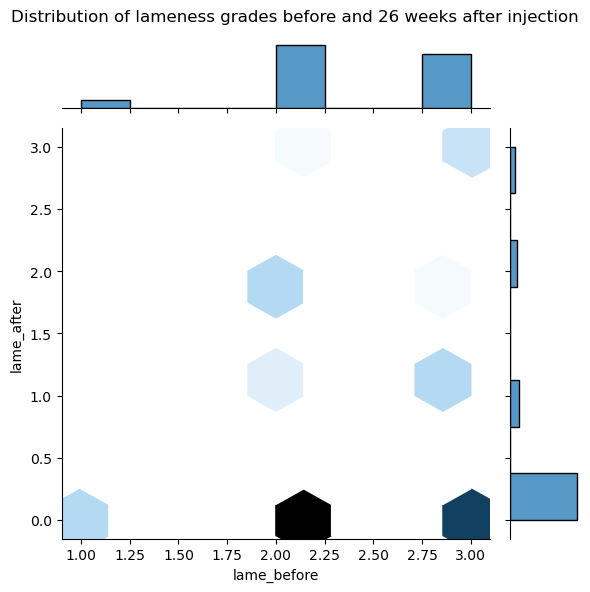

In [28]:
ax = sns.jointplot(data=combined,x="lame_before",y="lame_after",kind="hex")
ax.fig.suptitle("Distribution of lameness grades before and 26 weeks after injection")
ax.fig.tight_layout()

### Hypothesis testing


$ 𝐻_{0}: $ Horses have the same or worse lameness grades 26 weeks after the injection than before the injection.

$ 𝐻_{A}: $ Horses have improved lameness grades 26 weeks after the injection.

We will apply a pairwise t-test to this analysis, as the samples are related. This will be a one-tailed test.

In [29]:
t, p = stats.ttest_rel(combined["lame_before"],combined["lame_after"])

print('Lameness grades before injection vs. Lameness grades 26 weeks after injection: t = ', str(round(t,2)),'p (one-tailed) = ',str(round(p/2,6)))

Lameness grades before injection vs. Lameness grades 26 weeks after injection: t =  19.75 p (one-tailed) =  0.0


In [30]:
alpha=0.05
if p <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p,alpha))
    print("Reject the null hypothesis that horses have the same or worse lameness grades 26 weeks after the injection than before the injection.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p,alpha))
    print("Fail to reject the null hypothesis that horses have the same or worse lameness grades 26 weeks after the injection.")

Conclusion: since p_value 1.8347314088927293e-36 is less than alpha 0.05 
Reject the null hypothesis that horses have the same or worse lameness grades 26 weeks after the injection than before the injection.


We note that this analysis is a little simplified as the lameness grades are ordinal values and not normally distributed.

### Conclusions and Recommendation

The results of this study appear sufficiently interesting to recommend conducting a larger research study with a control group on a  double-blind basis to further analyse the efficacy of the polyacrylamide hydrogel injections.